<h1 style="color:red">Import data from mongo</h1>

In [144]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))

In [145]:
del data['_id']
data.head(22)

,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,query,retweets,tweets
0,3,0.810219,2182216.0,0,0.514879,0.197917,0.465469,0.260417,#MaxSteel,1301,1781
1,3,1.845403,24710273.0,0,0.153519,0.214224,0.576430,0.585985,#TheAccountant,10957,16708
2,3,2.458964,11767210.0,0,0.243336,0.199816,0.230479,0.345918,#KevinHartWhatNow,14787,18045
3,3,2.371755,28501448.0,0,0.155625,0.214810,0.308969,0.436256,#MadeaHalloween,9847,12710
4,3,2.181918,22872490.0,1,0.061304,0.098479,0.967504,0.493195,#JackReacherMovie,8783,10032
5,3,2.365276,5461475.0,0,0.168985,0.188103,0.324060,0.288585,#KeepingUpWithTheJoneses,2638,3882
6,3,0.787846,14065500.0,1,0.144015,0.097610,0.314912,0.238816,#OuijaMovie,12413,29983
7,3,1.616158,14860425.0,1,0.148348,0.236878,0.895807,0.488560,#InfernoMovie,7215,9444
8,3,1.344280,44725.0,0,0.342161,0.362162,0.159958,0.324324,#GimmeDanger,759,944
9,3,1.984609,46581142.0,0,0.019350,0.017159,0.657933,1.085895,#DreamWorksTrolls,12690,22481


<h1 style="color:blue">Make table readable</h1>

In [146]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets
0,#MaxSteel,1781,1301,3,0.810219,2182216.0,0,0.514879,0.197917,0.465469,0.260417
1,#TheAccountant,16708,10957,3,1.845403,24710273.0,0,0.153519,0.214224,0.576430,0.585985
2,#KevinHartWhatNow,18045,14787,3,2.458964,11767210.0,0,0.243336,0.199816,0.230479,0.345918
3,#MadeaHalloween,12710,9847,3,2.371755,28501448.0,0,0.155625,0.214810,0.308969,0.436256
4,#JackReacherMovie,10032,8783,3,2.181918,22872490.0,1,0.061304,0.098479,0.967504,0.493195
5,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,5461475.0,0,0.168985,0.188103,0.324060,0.288585
6,#OuijaMovie,29983,12413,3,0.787846,14065500.0,1,0.144015,0.097610,0.314912,0.238816
7,#InfernoMovie,9444,7215,3,1.616158,14860425.0,1,0.148348,0.236878,0.895807,0.488560
8,#GimmeDanger,944,759,3,1.344280,44725.0,0,0.342161,0.362162,0.159958,0.324324
9,#DreamWorksTrolls,22481,12690,3,1.984609,46581142.0,0,0.019350,0.017159,0.657933,1.085895


In [147]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(10, 'gross', gross)
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross
0,#MaxSteel,1781,1301,3,0.810219,0,0.514879,0.197917,0.465469,0.260417,2182216.0
1,#TheAccountant,16708,10957,3,1.845403,0,0.153519,0.214224,0.576430,0.585985,24710273.0
2,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.243336,0.199816,0.230479,0.345918,11767210.0
3,#MadeaHalloween,12710,9847,3,2.371755,0,0.155625,0.214810,0.308969,0.436256,28501448.0
4,#JackReacherMovie,10032,8783,3,2.181918,1,0.061304,0.098479,0.967504,0.493195,22872490.0
5,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.168985,0.188103,0.324060,0.288585,5461475.0
6,#OuijaMovie,29983,12413,3,0.787846,1,0.144015,0.097610,0.314912,0.238816,14065500.0
7,#InfernoMovie,9444,7215,3,1.616158,1,0.148348,0.236878,0.895807,0.488560,14860425.0
8,#GimmeDanger,944,759,3,1.344280,0,0.342161,0.362162,0.159958,0.324324,44725.0
9,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.019350,0.017159,0.657933,1.085895,46581142.0


In [148]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#MaxSteel,1781,1301,3,0.810219,0,0.514879,0.197917,0.465469,0.260417,2182216.0,7.274053e+05
1,#TheAccountant,16708,10957,3,1.845403,0,0.153519,0.214224,0.576430,0.585985,24710273.0,8.236758e+06
2,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.243336,0.199816,0.230479,0.345918,11767210.0,3.922403e+06
3,#MadeaHalloween,12710,9847,3,2.371755,0,0.155625,0.214810,0.308969,0.436256,28501448.0,9.500483e+06
4,#JackReacherMovie,10032,8783,3,2.181918,1,0.061304,0.098479,0.967504,0.493195,22872490.0,7.624163e+06
5,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.168985,0.188103,0.324060,0.288585,5461475.0,1.820492e+06
6,#OuijaMovie,29983,12413,3,0.787846,1,0.144015,0.097610,0.314912,0.238816,14065500.0,4.688500e+06
7,#InfernoMovie,9444,7215,3,1.616158,1,0.148348,0.236878,0.895807,0.488560,14860425.0,4.953475e+06
8,#GimmeDanger,944,759,3,1.344280,0,0.342161,0.362162,0.159958,0.324324,44725.0,1.490833e+04
9,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.019350,0.017159,0.657933,1.085895,46581142.0,1.552705e+07


<h2>Plotting</h2>

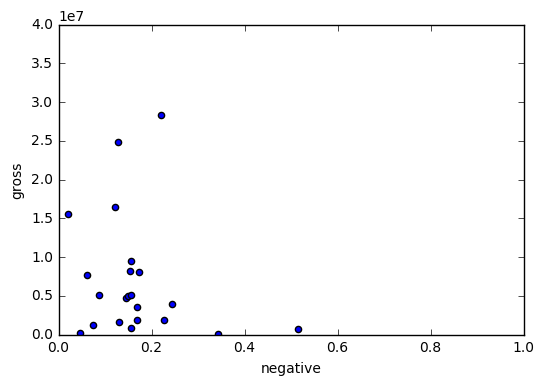

In [149]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 1, 0, 40000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

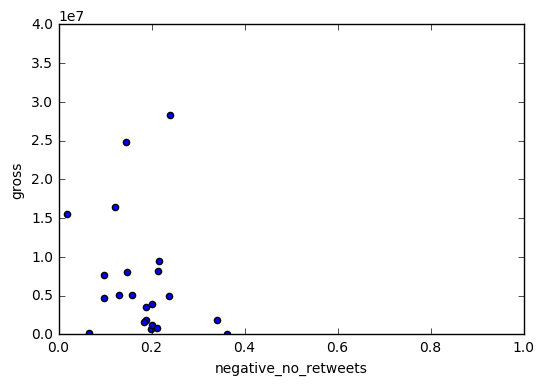

In [150]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 1, 0, 40000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

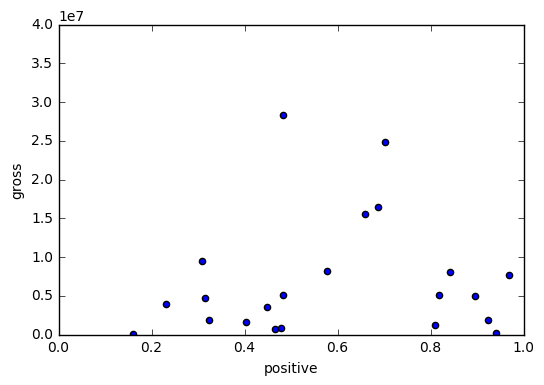

In [151]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 1, 0, 40000000])
plt.scatter(data['positive'], data['grossPerDay'])
plt.show()

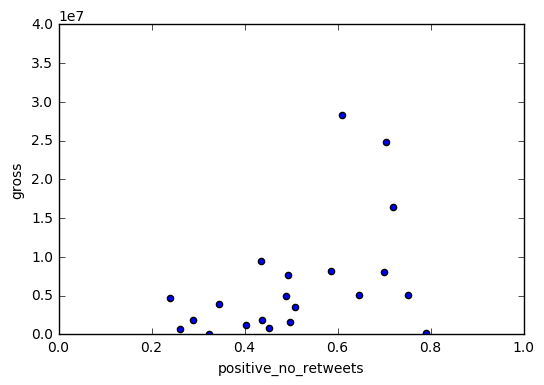

In [152]:
plt.ylabel('gross')
plt.xlabel('positive_no_retweets')
plt.axis([0, 1, 0, 40000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

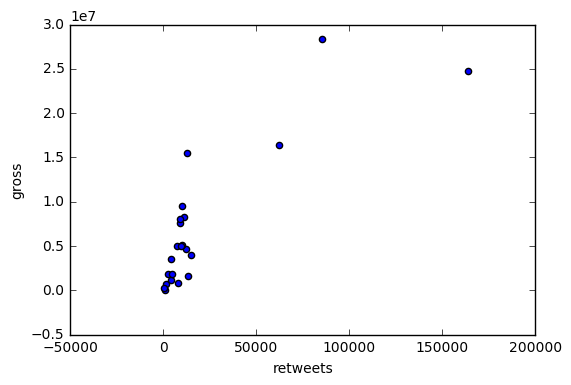

In [153]:
plt.ylabel('gross')
plt.xlabel('retweets')
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

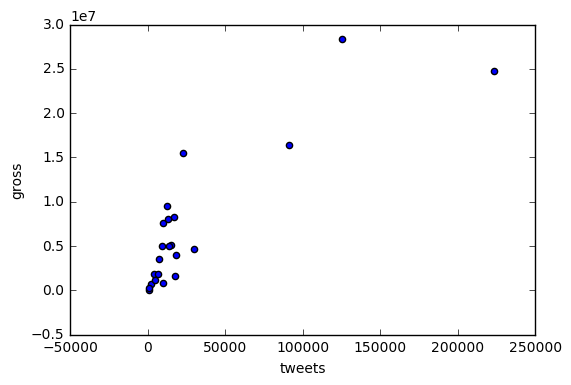

In [154]:
plt.ylabel('gross')
plt.xlabel('tweets')
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [155]:
data['percentretweets'] = data.retweets/data.tweets
data.head(22)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay,percentretweets
0,#MaxSteel,1781,1301,3,0.810219,0,0.514879,0.197917,0.465469,0.260417,2182216.0,7.274053e+05,0.730488
1,#TheAccountant,16708,10957,3,1.845403,0,0.153519,0.214224,0.576430,0.585985,24710273.0,8.236758e+06,0.655794
2,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.243336,0.199816,0.230479,0.345918,11767210.0,3.922403e+06,0.819451
3,#MadeaHalloween,12710,9847,3,2.371755,0,0.155625,0.214810,0.308969,0.436256,28501448.0,9.500483e+06,0.774744
4,#JackReacherMovie,10032,8783,3,2.181918,1,0.061304,0.098479,0.967504,0.493195,22872490.0,7.624163e+06,0.875498
5,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.168985,0.188103,0.324060,0.288585,5461475.0,1.820492e+06,0.679547
6,#OuijaMovie,29983,12413,3,0.787846,1,0.144015,0.097610,0.314912,0.238816,14065500.0,4.688500e+06,0.414001
7,#InfernoMovie,9444,7215,3,1.616158,1,0.148348,0.236878,0.895807,0.488560,14860425.0,4.953475e+06,0.763977
8,#GimmeDanger,944,759,3,1.344280,0,0.342161,0.362162,0.159958,0.324324,44725.0,1.490833e+04,0.804025
9,#DreamWorksTrolls,22481,12690,3,1.984609,0,0.019350,0.017159,0.657933,1.085895,46581142.0,1.552705e+07,0.564477


In [156]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
del data['daysInTheater']
data.head(22)

,query,tweets,retweets,percentretweets,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#MaxSteel,1781,1301,0.730488,0.810219,0,0.514879,0.197917,0.465469,0.260417,2182216.0,7.274053e+05
1,#TheAccountant,16708,10957,0.655794,1.845403,0,0.153519,0.214224,0.576430,0.585985,24710273.0,8.236758e+06
2,#KevinHartWhatNow,18045,14787,0.819451,2.458964,0,0.243336,0.199816,0.230479,0.345918,11767210.0,3.922403e+06
3,#MadeaHalloween,12710,9847,0.774744,2.371755,0,0.155625,0.214810,0.308969,0.436256,28501448.0,9.500483e+06
4,#JackReacherMovie,10032,8783,0.875498,2.181918,1,0.061304,0.098479,0.967504,0.493195,22872490.0,7.624163e+06
5,#KeepingUpWithTheJoneses,3882,2638,0.679547,2.365276,0,0.168985,0.188103,0.324060,0.288585,5461475.0,1.820492e+06
6,#OuijaMovie,29983,12413,0.414001,0.787846,1,0.144015,0.097610,0.314912,0.238816,14065500.0,4.688500e+06
7,#InfernoMovie,9444,7215,0.763977,1.616158,1,0.148348,0.236878,0.895807,0.488560,14860425.0,4.953475e+06
8,#GimmeDanger,944,759,0.804025,1.344280,0,0.342161,0.362162,0.159958,0.324324,44725.0,1.490833e+04
9,#DreamWorksTrolls,22481,12690,0.564477,1.984609,0,0.019350,0.017159,0.657933,1.085895,46581142.0,1.552705e+07


In [157]:
del data['query']

<h1 style="color:orange">Sklearn Stuff</h1>

In [158]:
total_data = data.values
f_col = ['tweets', 'positive_no_retweets']
X = data[f_col]
y = data[['gross']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
scaled_X = preprocessing.scale(X)
scaled_y = preprocessing.scale(y)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
X_train

array([[ 0.00417477, -1.48053925],
       [ 1.19488598,  0.91691208],
       [-0.44204007, -0.13344835],
       [-0.33221965, -0.4928725 ],
       [-0.56076064,  1.2814334 ],
       [-0.14192788,  2.75686899],
       [-0.38437413, -0.20804279],
       [-0.50414636, -1.23157576],
       [ 3.77259853,  0.84939344],
       [-0.25435797,  0.25613018],
       [-0.22831968, -0.94477685],
       [-0.39582552, -0.23122712],
       [-0.23813516, -0.18783201],
       [-0.39064513, -0.41155931],
       [-0.29190607,  1.08112875],
       [-0.44983014, -0.48518558],
       [-0.30676562,  0.55720383],
       [-0.32111881,  0.82716556],
       [-0.56136437, -1.05279525]])

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)

print (clf.intercept_)
print (clf.coef_)

[ 21898195.38145164]
[[ 16164902.71385008   7073675.34401134]]


In [160]:
clf.predict(X_test)

array([[ 54659633.00497214],
       [  3378778.08145083],
       [  9319192.30551312]])

In [161]:
y_test


,gross
12,85058311.0
0,2182216.0
14,3613567.0


<h1 style="color:red">Cross Validation</h1>

In [167]:
from sklearn.cross_validation import cross_val_score
X=data[f_col]
print (X.shape)
y=data['gross']
print (y.shape)

(22, 2)
(22,)


In [168]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, scaled_X, y, cv=21, scoring='mean_squared_error')
print(mse_list)

[ -1.27738987e+13  -6.62217476e+10  -2.63432270e+14  -8.31412705e+13
  -6.12951518e+11  -2.88265028e+12  -1.12870424e+12  -2.95821749e+13
  -1.49237452e+14  -6.10128541e+14  -1.24647824e+14  -9.28670070e+14
  -4.09844710e+13  -3.44444069e+13  -2.24790436e+12  -7.21365112e+15
  -1.19651850e+14  -1.69576631e+14  -1.18501252e+15  -1.84096460e+13
  -4.29227733e+12]


In [169]:
mse_list_positive = -mse_list

In [170]:
import numpy as np
rmse_list = np.sqrt(mse_list_positive)
print rmse_list

[  3574059.13412853    257335.86540952  16230596.71388494
   9118183.51121849    782912.20340978   1697836.94047241
   1062404.93104228   5438949.79320091  12216278.15296005
  24700780.16230161  11164578.98393206  30474088.49641851
   6401911.51149564   5868935.75240683   1499301.28982403
  84933215.63396555  10938548.82489618  13022159.21067158
  34424010.81939861   4290646.33574783   2071781.19774334]


In [171]:
print (rmse_list.mean())

13341357.8793
